In [2]:
from sklearn import datasets
import json
from openTSNE import TSNE
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
iris = datasets.load_iris()

In [28]:
x, y = iris["data"], iris["target"]

embedding = TSNE().fit(x)

In [29]:
data = pd.DataFrame(embedding, columns=["Comp1","Comp2"])
data["Label"] = y
data

,Comp1,Comp2,Label
0,-0.725556,16.491301,0
1,0.094228,18.828727,0
2,1.110939,18.527167,0
3,1.070374,18.862548,0
4,-1.070670,16.605049,0
...,...,...,...
145,-3.440535,-10.341798,2
146,-1.145439,-8.051028,2
147,-2.786464,-9.732761,2
148,-3.668606,-11.242260,2


In [30]:
# TODO add the Target Information into  your json file
#with open('data.json', 'w') as f:
    #json.dump(np.array(embedding).tolist(), f)
    
output = data.to_json(orient='records')
with open('tsne_output.json', 'w') as file:
    file.write(output)

Text(42.202125000000024, 0.5, 'Comp 2')

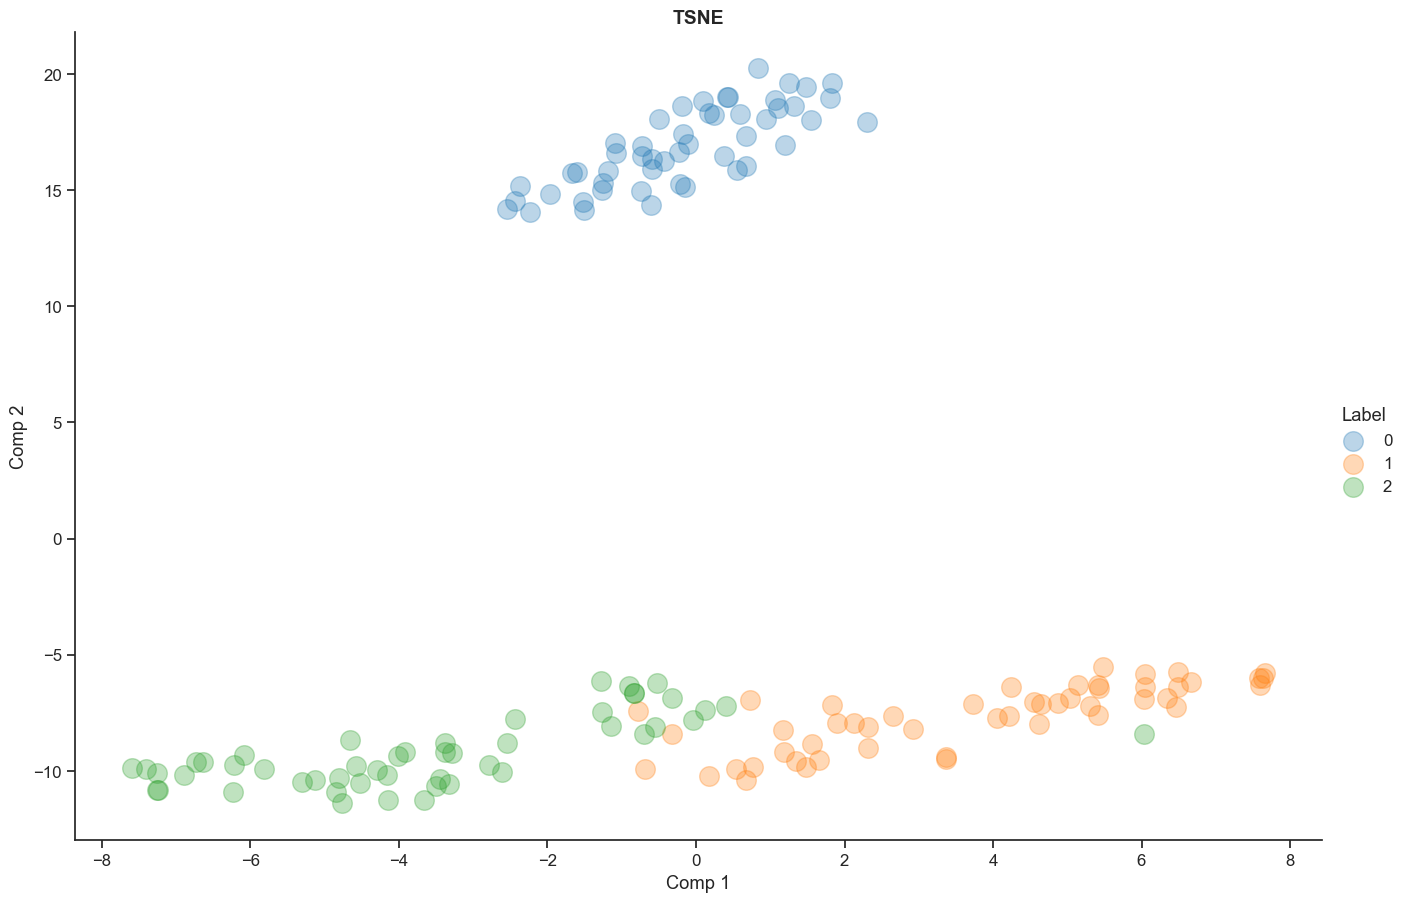

In [31]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='Comp1',
           y='Comp2',
           data=data,
           fit_reg=False,
           legend=True,
           hue='Label',
           scatter_kws={"s":200, "alpha":0.3},
           height=9, aspect=1.5
          )

plt.title("TSNE", weight='bold').set_fontsize('14')
plt.xlabel('Comp 1')
plt.ylabel('Comp 2')

In [21]:
import umap
from sklearn.preprocessing import StandardScaler

In [22]:
reducer = umap.UMAP()
iris = datasets.load_iris()

In [23]:
x, y = iris["data"], iris["target"]

scaled_x = StandardScaler().fit_transform(x)
embedding = reducer.fit_transform(scaled_x)

In [24]:
data = pd.DataFrame(embedding, columns=["Comp1","Comp2"])
data["Label"] = y

Text(41.71688194444445, 0.5, 'Comp 2')

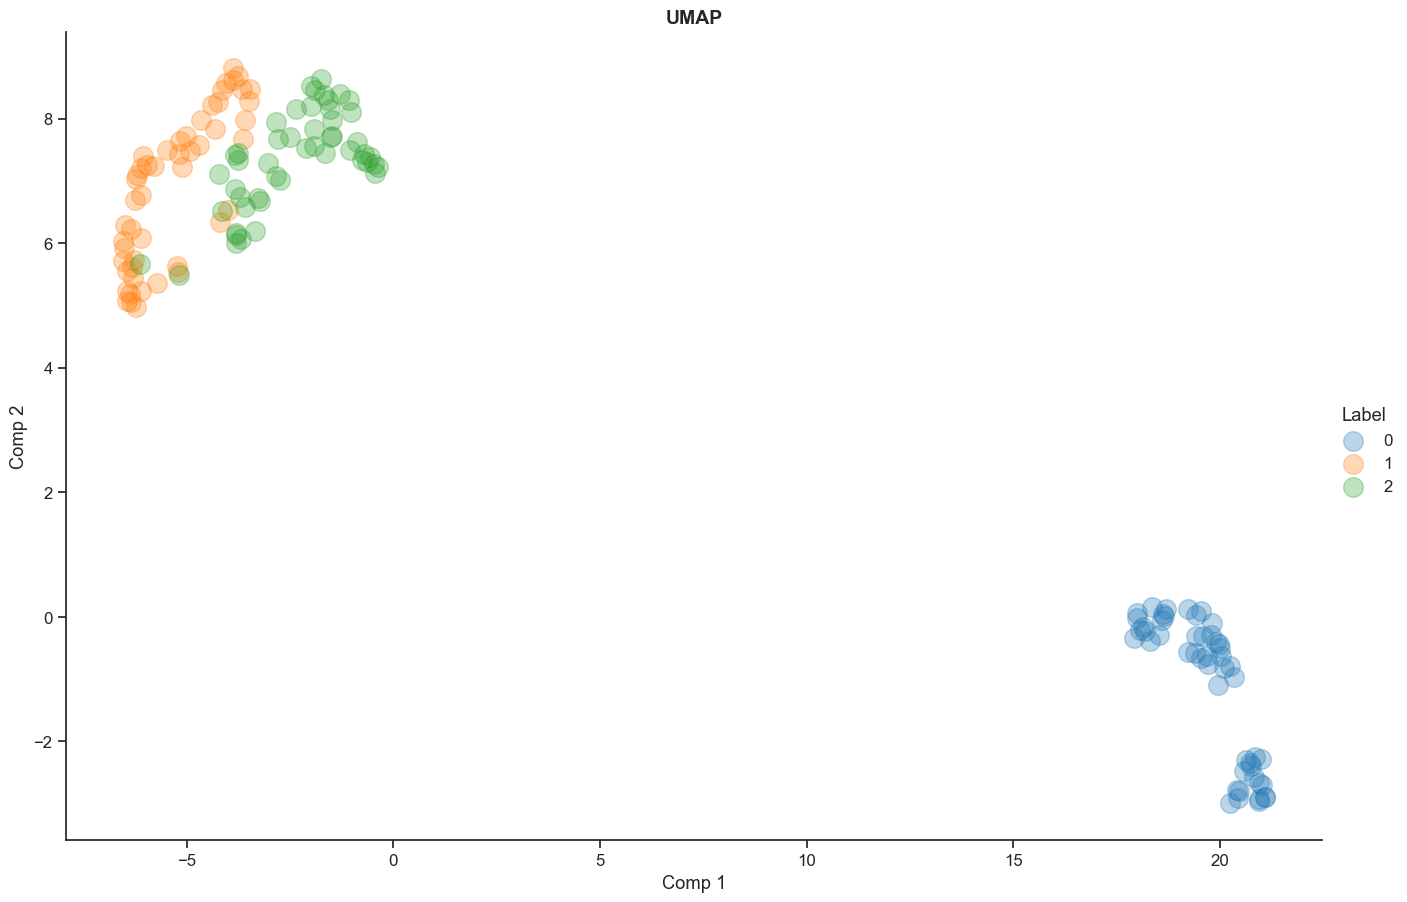

In [25]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='Comp1',
           y='Comp2',
           data=data,
           fit_reg=False,
           legend=True,
           hue='Label',
           scatter_kws={"s":200, "alpha":0.3},
           height=9, aspect=1.5
          )

plt.title("UMAP", weight='bold').set_fontsize('14')
plt.xlabel('Comp 1')
plt.ylabel('Comp 2')

In [26]:
output = data.to_json(orient='records')
with open('umap_output.json', 'w') as file:
    file.write(output)